## 비트코인 가격 예측 : ARIMA

### ARIMA 모델 활용 비트코인 시세 예측

In [ ]:
ARIMA : Autoregressive integrated moving average
자동회귀누적이동평균 모델

자동회귀이동평균(ARMA : Autoregressive moving average) 모델의 일반화

ARIMA기법은 전통적인 시계열 예측 방법으로 크게 두 가지 개념을 포함 
(1) AR(Autoregression) 모델로 자기 자신의 과거를 정보로 사용하는 개념 
- 진화하는 관심 변수가 시차(즉, 이전) 값으로 회귀됨
(2)  MA(Moving Average) 모델
- 회귀 오류가 실제로 과거 여러 시간에 동시에 발생한 오류 항의 선형 조합 

이 둘을 합친것을 ARMA 모델이라고 하며, 
- ARIMA(Autoregressice Integrated Moving Average) 모델은   
- ARMA 모델에 추세 변동의 경향성 까지 반영한 방법


- 파이썬에서는 statsmodels 모듈로 ARIMA 분석 수행 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [9]:
# 사용 데이터
# https://www.blockchain.com/ko/charts/market-price?timespan=60days

file_path = './data/market-price_3y.csv'
bitcoin_df = pd.read_csv(file_path, names =['day', 'price'], header=0)
bitcoin_df

,day,price
0,2018-09-15 00:00:00,6487.12
1,2018-09-16 00:00:00,6522.39
2,2018-09-17 00:00:00,6497.37
3,2018-09-18 00:00:00,6253.99
4,2018-09-19 00:00:00,6342.39
...,...,...
1090,2021-09-09 00:00:00,46078.38
1091,2021-09-10 00:00:00,46368.69
1092,2021-09-11 00:00:00,44847.48
1093,2021-09-12 00:00:00,45144.79


In [5]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     1095 non-null   object 
 1   price   1095 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [10]:
# 문자열 day를 날짜형으로 형변환 : to_datetime()
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'] )
bitcoin_df

,day,price
0,2018-09-15,6487.12
1,2018-09-16,6522.39
2,2018-09-17,6497.37
3,2018-09-18,6253.99
4,2018-09-19,6342.39
...,...,...
1090,2021-09-09,46078.38
1091,2021-09-10,46368.69
1092,2021-09-11,44847.48
1093,2021-09-12,45144.79


In [11]:
# day로 인덱스 설정
bitcoin_df.set_index('day', inplace=True)
bitcoin_df.head()

,price
day,
2018-09-15,6487.12
2018-09-16,6522.39
2018-09-17,6497.37
2018-09-18,6253.99
2018-09-19,6342.39


In [12]:
bitcoin_df.tail()

,price
day,
2021-09-09,46078.38
2021-09-10,46368.69
2021-09-11,44847.48
2021-09-12,45144.79
2021-09-13,46059.12


In [21]:
# 학습/예측에 사용할 데이터
train_df = bitcoin_df.loc['2020-09-01':'2021-08-31']
train_df

,price
day,
2020-09-01,11659.57
2020-09-02,11923.25
2020-09-03,11397.44
2020-09-04,10187.51
2020-09-05,10467.89
...,...
2021-08-27,46962.80
2021-08-28,49056.86
2021-08-29,48897.65


In [17]:
# 실제값 데이터로 사용
test_df = bitcoin_df.loc['2021-09-01':'2021-09-05']
test_df

,price
day,
2021-09-01,47155.87
2021-09-02,48862.76
2021-09-03,49329.01
2021-09-04,50035.33
2021-09-05,49947.38


In [ ]:
# 일자별 비트코인 시세 시각화
train_df.plot()
plt.show()

In [ ]:
# statsmodels 설치
# pip install statsmodels

### ARIMA 모델 생성

In [ ]:
-ARIMA 클래스에 order=(2,1,2)라고 입력되어진 파라미터는   
-AR이 몇번째 과거까지를 바라보는지에 대한 파라미터 (2),   
-차분(Defference)에 대한 파라미터(1),  
-MA가 몇 번째 과거까지를 바라보는지에 대한 파라미터(2)’를 의미  

차분이란 현재 상태의 변수에서 바로 전 상태의 변수를 빼주는 것을 의미하며,   
시계열 데이터의 불규칙성을 조금이나마 보정해주는 역할을 함   
또한 앞서 말한 ARIMA 모델의 경향성을 의미 

In [31]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR:2, 차분:1, MA:2)
model = ARIMA(train_df.price.values, order=(2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)

In [32]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3206.805
Method:                       css-mle   S.D. of innovations           1621.201
Date:                Tue, 14 Sep 2021   AIC                           6425.610
Time:                        09:41:50   BIC                           6448.993
Sample:                             1   HQIC                          6434.903
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.2121     90.028      1.069      0.285     -80.240     272.664
ar.L1.D.y      0.4099      0.433      0.946      0.344      -0.439       1.259
ar.L2.D.y      0.0224      0.346      0.065      0.9

<AxesSubplot:>

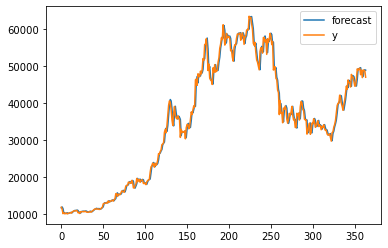

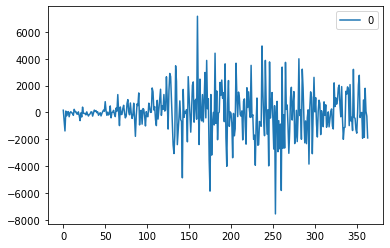

In [34]:
# 예측 시각화
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과 (첫 번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차 변동 시각화 (두 번째 그래프)
residuals.plot()

### 실제 데이터와 비교

In [ ]:
# 학습 데이터 이후 5일 예측값을 실제값 비교
# 실제값 : test_df 가정

In [35]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터 셋 이후 5일 뒤 예측

pred_y = forecast_data[0].tolist()# 5일 예측값
test_y = test_df.price.values #  5일 실제값

pred_y_lower = []
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

In [36]:
forecast_data

# forecast() 반환값
# forecast : ndarray
#     Array of out of sample forecasts
# stderr : ndarray
#     Array of the standard error of the forecasts.
# conf_int : ndarray
#     2d array of the confidence interval for the forecast

(array([47345.86078331, 47268.9769505 , 47298.16202737, 47363.01415372,
        47444.86719428]),
 array([1621.20108443, 2185.79187886, 2716.58517433, 3188.79649754,
        3611.99176185]),
 array([[44168.36504613, 50523.35652049],
        [42984.90359023, 51553.05031077],
        [41973.75292474, 52622.57113   ],
        [41113.08786451, 53612.94044293],
        [40365.4934286 , 54524.24095996]]))

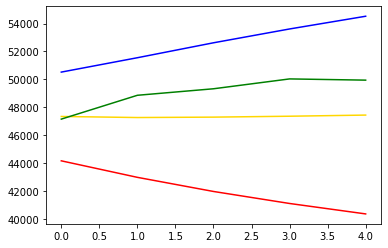

In [37]:
plt.plot(pred_y, color='gold') # 모델이 예상한 가격 그래프
plt.plot(pred_y_lower, color='red') # 모델이 예상한 최소가격 그래프
plt.plot(pred_y_upper, color='blue') # 모델이 예상한 최대가격 그래프
plt.plot(test_y, color='green') # 실제 가격 그래프

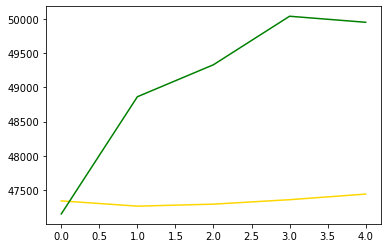

In [38]:
plt.plot(pred_y, color='gold') # 모델이 예상한 가격 그래프
plt.plot(test_y, color='green') # 실제 가격 그래프

In [39]:
pred_y

[47345.860783306794,
 47268.97695049781,
 47298.16202737264,
 47363.01415371997,
 47444.86719428086]

In [40]:
test_y

array([47155.87, 48862.76, 49329.01, 50035.33, 49947.38])

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

2005.2145381287446
